## Part I: Preprocessing and EDA

- The data comes from a global e-retailer company, including orders from 2012 to 2015. Import the **Orders** dataset and do some basic EDA. 
- For problem 1 to 3, we mainly focus on data cleaning and data visualizations. You can use all the packages that you are familiar with to conduct some plots and also provide **brief interpretations** about your findings.

### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 

In [30]:
import pandas as pd
orders = pd.read_csv('../data/Orders.csv', index_col=0, parse_dates=True)

In [64]:
orders['Profit'] = pd.to_numeric(orders['Profit'].str.replace('$', '').str.replace(',',''))
orders['Sales'] = pd.to_numeric(orders['Sales'].str.replace('$', '').str.replace(',',''))



### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.

In [65]:
#pd.set_option('display.max_columns', None)
# Create new column 'Season': Spring runs from March 1 to May 31; Summer runs from June 1 to August 31; 
# Fall (autumn) runs from September 1 to November 30; and. Winter runs from December 1 to February 28 (February 29 in a leap year).
######
# group by Categories, Season -> sum Quantity
# ifelse(orders['Order.Date'] >= 'March 1' and orders['Order.Date'] <= 'May31', ''

In [66]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])
orders = orders.set_index(orders['Order.Date'])

bins = [0, 91, 183, 275, 366]
labels=['Winter', 'Spring', 'Summer', 'Fall']
doy = orders.index.dayofyear
orders['Season'] = pd.cut(doy + 11 - 366*(doy > 355), bins=bins, labels=labels)



In [67]:
season_trend = orders.groupby(['Season','Category']).agg({'Quantity':['sum']})


In [68]:
season_trend['Quantity']# .sort_values(by='sum', ascending=False)

sum
Season Category              
Winter Furniture         6083
       Office Supplies  18440
       Technology        6192
Spring Furniture         7524
       Office Supplies  24359
       Technology        7698
Summer Furniture         9243
       Office Supplies  29547
       Technology        9567
Fall   Furniture        12042
       Office Supplies  35898
       Technology       11719

In [69]:
season_trend = season_trend.reset_index()

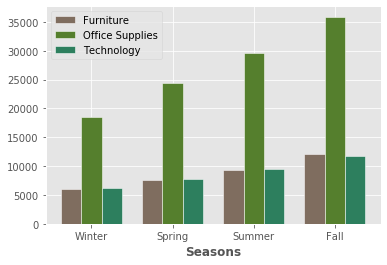

In [70]:
######## Maybe we should use a line chart for this ########
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# set width of bar
barWidth = 0.25
 
# set height of bar
bars1 = np.array(season_trend[season_trend['Category']=='Furniture']['Quantity']['sum']) #furniture
bars2 = np.array(season_trend[season_trend['Category']=='Office Supplies']['Quantity']['sum'])
bars3 = np.array(season_trend[season_trend['Category']=='Technology']['Quantity']['sum'])
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Furniture')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Office Supplies')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='Technology')
 
# Add xticks on the middle of the group bars
plt.xlabel('Seasons', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Winter', 'Spring', 'Summer', 'Fall'])
 
# Create legend & Show graphic
plt.legend()
plt.show()

In [71]:
#import seaborn as sns
#sns.catplot(x="Season", y="Quantity", hue="Category", kind="bar", data=season_trend)

### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?


	2. How many customer returned more than once? more than 5 times?


	3. Which regions are more likely to return orders?


	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

In [72]:
returns = pd.read_csv('Returns.csv')
returns.columns = ['Order.ID', 'Region']

FileNotFoundError: [Errno 2] File b'Returns.csv' does not exist: b'Returns.csv'

In [73]:
orders

,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,new,Season
Order.Date,,,,,,,,,,,,,,,,,,,,,
2014-11-11,CA-2014-AB10015140-41954,2014-11-11,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,Phones,Samsung Convoy 3,221.98,2,0.0,62.15,40.770,High,NaN,Fall
2014-02-05,IN-2014-JR162107-41675,2014-02-05,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,Chairs,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.630,Critical,NaN,Winter
2014-10-17,IN-2014-CR127307-41929,2014-10-17,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,...,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.490,Medium,NaN,Fall
2014-01-28,ES-2014-KM1637548-41667,2014-01-28,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,...,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.160,Medium,NaN,Winter
2014-11-05,SG-2014-RH9495111-41948,2014-11-05,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,...,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.040,Critical,NaN,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-19,IN-2015-KE1642066-42174,2015-06-19,6/19/15,Same Day,KE-1642066,Katrina Edelman,Corporate,NaN,Kure,Hiroshima,...,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.10,5,0.0,4.50,1.010,Medium,NaN,Spring
2014-05-06,US-2014-ZD21925140-41765,2014-05-06,5/10/14,Standard Class,ZD-219251408,Zuschuss Donatelli,Consumer,37421.0,Chattanooga,Tennessee,...,Furnishings,"Eldon Image Series Desk Accessories, Burgundy",16.72,5,0.2,3.34,1.930,High,NaN,Spring
2012-08-26,CA-2012-ZD21925140-41147,2012-08-26,8/31/12,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,94109.0,San Francisco,California,...,Art,Newell 341,8.56,2,0.0,2.48,1.580,High,NaN,Summer


### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?


	2. How many customer returned more than once? more than 5 times?


	3. Which regions are more likely to return orders?


	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

In [74]:
returned_orders = orders.merge(returns, left_on='Order.ID', right_on='Order.ID')

In [75]:
returned_orders['Order.ID']

0       IN-2012-PB19210127-41259
1       IN-2012-PB19210127-41259
2       IN-2012-PB19210127-41259
3       IN-2012-PB19210127-41259
4       IN-2012-PB19210127-41259
                  ...           
2215    CA-2014-WB21850140-41654
2216    CA-2014-WB21850140-41654
2217     US-2013-SJ2021582-41543
2218    CA-2012-ZC21910140-41271
2219      EG-2014-PM894038-41846
Name: Order.ID, Length: 2220, dtype: object

In [76]:
returned_orders['Year'] = pd.DatetimeIndex(returned_orders['Order.Date']).year

In [16]:
returned_orders.groupby(['Year']).agg({"Profit":['sum']})

,Profit
,sum
Year,
2012,17477.26
2013,9269.89
2014,17510.63
2015,17112.97


<Figure size 864x576 with 0 Axes>

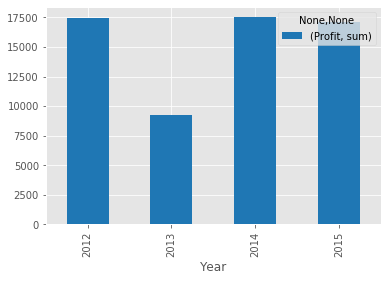

<Figure size 864x576 with 0 Axes>

In [17]:
#plotting the price according to year
returned_orders.groupby(['Year']).agg({"Profit":['sum']}).plot(kind='bar', color='tab:blue')
plt.figure(figsize=(12,8))

In [18]:
# 2. How many customer returned more than once? more than 5 times?
returned_orders_customer = returned_orders.groupby(['Customer.ID','Order.ID']).agg({"Order.ID":['count']})

In [19]:
returned_orders_customer = returned_orders_customer.reset_index()


In [20]:
returned_orders_customer[returned_orders_customer['Order.ID']['count']>1]['Customer.ID'].size
# How many customer returned more than once? 551

551

In [21]:
returned_orders_customer[returned_orders_customer['Order.ID']['count']>5]['Customer.ID'].size
# How many customer returned more than 5 times? 41

41

In [22]:
# 3. Which regions are more likely to return orders?

returned_orders_regions = pd.DataFrame(returns.groupby(['Region']).size())

In [23]:
(returned_orders_regions / returned_orders_regions[0].sum() * 100).round(2).sort_values([0], ascending=False)

,0
Region,
Western Europe,11.21
Central America,10.84
Oceania,7.23
Western US,6.67
Eastern US,6.39
Southeastern Asia,5.93
South America,5.65
Southern Asia,5.38
Southern Europe,5.10


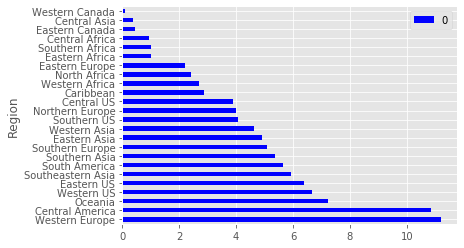

In [24]:
(returned_orders_regions / returned_orders_regions[0].sum() * 100).round(2).sort_values([0], ascending=False).plot(kind='barh', color='b')

In [25]:
# 4. Which categories (sub-categories) of products are more likely to be returned?
returned_categories = pd.DataFrame(returned_orders.groupby(['Category','Sub.Category']).size()) #agg({"count"})

In [26]:
# returned_categories = returned_categories.reset_index()

In [27]:
(returned_categories / returned_categories[0].sum() * 100).round(2).sort_values([0], ascending=False)

0
Category        Sub.Category       
Office Supplies Binders       12.12
                Art            9.77
                Storage        9.55
                Paper          6.76
Furniture       Chairs         6.62
Technology      Phones         6.53
                Accessories    6.22
Office Supplies Labels         6.17
Furniture       Furnishings    6.08
                Bookcases      4.68
Office Supplies Supplies       4.64
                Fasteners      4.59
                Envelopes      4.46
Technology      Copiers        4.46
                Machines       2.84
Office Supplies Appliances     2.66
Furniture       Tables         1.85

In [28]:
x=pd.DataFrame(returned_categories / returned_categories[0].sum() * 100).round(2).sort_values([0], ascending=False)

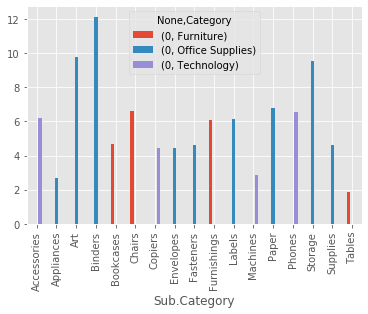

In [29]:
x.unstack(level=0).plot(kind='bar', subplots=False)

## Problem 4

Step 1: Create the dependent variable
First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.
Hint: the returned orders’ IDs are contained in the dataset “returns”

In [27]:
orders1 = pd.read_csv('../data/Orders.csv')
returns1 = pd.read_csv('../data/Returns.csv')
returns1.columns = ['Returns', 'Order.ID', 'Region']

In [28]:
new_orders = pd.merge(orders1, returns1, left_on='Order.ID', right_on='Order.ID', how='outer')
new_orders['Returns'].unique()
new_orders['Returns']=new_orders['Returns'].fillna('No')

Step 2: Your manager believes that how long it took the order to ship would affect whether the customer would return it or not. He wants you to generate a feature which can measure how long it takes the company to process each order. Hint: Process.Time = Ship.Date - Order.Date

In [ ]:
new_orders['Ship.Date']= pd.to_datetime(new_orders['Ship.Date'])
new_orders['Order.Date']= pd.to_datetime(new_orders['Order.Date'])
new_orders['Process.Time'] = new_orders['Ship.Date'].sub(new_orders['Order.Date'], axis=0)

Step 3: If a product has been returned before, it may be returned again. Let us generate a feature indictes how many times the product has been returned before. If it never got returned, we just impute using 0. Hint: Group by different Product.ID

In [ ]:
new_orders['Returned.Before'] = new_orders['Returns']

In [ ]:
new_orders['Returned.Before'].loc[new_orders['Returned.Before']=='No'].str.replace('No','0') 
new_orders['Returned.Before'].unique()